In [1]:
import sys
sys.path = [p for p in sys.path if ".local" not in p]


import scirpy as ir
import pandas as pd
import os
import scanpy as sc
import anndata as ad
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import sparse
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
rcParams['figure.figsize'] = (7,7)
import seaborn as sns
import muon as mu
import anndata as an

In [2]:
cell_groups = {
    "T_Cells_CD4": [
        "CD4+_T",
        "CD4+_Treg",
        "Stem/Memory_Signal_T"
    ],
    "T_Cells_CD8": [
        "CD8+_(Term)Exh_T",
        "CD8+_(Pre)Exh_T",
        "CD8+_(TPEX)Exh_T",
        "CD8+_HiRib_T",
        "CD8+_Cyto_T"
    ],
    "Cycling_Proliferative_Cells": [
        "Proli"
    ],
    "Unconventional_T": [
        "γδ_T",
        "(Unconventional)T"
    ],
    "B_Cells_and_Plasma_Cells": [
        "(Naive)_B",
        "(Early_Act)_B",
        "(HiRib)_B",
        "(Memory)_B",
        "B(Early)",
        "Plasma"
    ],
    "Myeloid_Cells": [
        "Classical_Monocytes",
        "M2_Macs",
        "Macs(TAM)_1",
        "Macs(TAM)_2",
        "Macs(TAM)_3",
    ],
    "Neutros" : [
                "Neutro",
        "Inflam_Mono/Neutro(TAN)",
        "Neutro(TAN)",
        "Neutro(TIN)",
    ],
    "Dendritic" : [
                "DC(moDCs)",
        "DC(cDC1)",
        "pDCs"
    ],
    "NK_Cells": [
        "NK"
    ],
    "Stromal_NonImmune_Cells": [
        "(CAF-EMT)",
        "(TAV)"
    ]
}
cell_colors = {'CD4+_T': '#6820aaff',
 'CD4+_Treg': '#8d58bfd2',
 'Stem/Memory_Signal_T': '#b390d4a6',
 'CD8+_(Term)Exh_T': '#a50f2dff',
 'CD8+_(Pre)Exh_T': '#b43750e1',
 'CD8+_(TPEX)Exh_T': '#c35f73c4',
 'CD8+_HiRib_T': '#d28796a6',
 'CD8+_Cyto_T': '#e1afb988',
 '(Naive)_B': '#000060ff',
 '(Early_Act)_B': '#242477e6',
 '(HiRib)_B': '#49498dcc',
 '(Memory)_B': '#6d6da4b2',
 'B(Early)': '#9292bb99',
 'Plasma': '#b6b6d280',
 'Classical_Monocytes': '#004b00ff',
 'M2_Macs': '#2a692ae1',
 'Macs(TAM)_1': '#558755c4',
 'Macs(TAM)_2': '#80a580a6',
 'Macs(TAM)_3': '#aac3aa88',
 'Neutro': '#a354a0ff',
 'Inflam_Mono/Neutro(TAN)': '#b676b3db',
 'Neutro(TAN)': '#c898c6b8',
 'Neutro(TIN)': '#dabbd994',
 'DC(moDCs)': '#82bf23ff',
 'DC(cDC1)': '#a1cf5ad2',
 'pDCs': '#c0df91a6',
 'NK': '#bf6900ff',
 '(CAF-EMT)': '#68340eff',
 '(TAV)': '#9b785ec4',
 'Proli': '#4f4f4fff',
 'γδ_T': '#680000ff',
 '(Unconventional)T': '#9b5555c4'}
palette_samples = {'S741_Veh': '#1f77b4',
'S743_Veh': '#e377c2',
 'S744_Veh': '#d62728',
 'S760_Veh': '#8c564b',
 'S742_NMDi': '#2ca02c',
 'S745_NMDi': '#9467bd',
 'S746_NMDi': '#ff7f0e',
 'S761_NMDi': '#7f7f7f'
}
import os
import scanpy as sc
import anndata as ad
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import sparse
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
rcParams['figure.figsize'] = (7,7)
import seaborn as sns
import pandas as pd
import scirpy as ir
adata = sc.read('../objects/adata_metadata.h5ad', compression='gzip')

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


# LOAD DATA AND BUILD MUDATA

In [3]:
mdata = mu.read('../objects/mdata_raw.h5mu')

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/anndata/utils.py:334: ExperimentalFeatureWarning: Support for Awkward Arrays is currently experimental. Behavior may change in the future. Please report any issues you may encounter!
  warnings.warn(msg, category, stacklevel=stacklevel)


In [4]:
mdata = mu.MuData({'gex':adata,'airr':mdata['airr_tcr']})
mdata

MuData object with n_obs × n_vars = 73640 × 25760
  2 modalities
    gex:	71977 x 25760
      obs:	'library', 'sample_barcode', 'sample_name', 'source', 'DoubletDetection', 'DoubletDetection_score', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'leiden_0.1', 'leiden_0.15', 'Annotation_l1', 'leiden', 'Annotation_l2', 'qc_filter_reason', 'L1_Voting', 'L2_Voting', 'cd4_score', 'cd8_score', 'Monocyte_score', 'Macrophage_score', 'Annotation', 'gex:Annotation_updated', 'Annotation_updated', 'Treatment', 'Cells_injectyed', 'Lung_Weight', 'sample_state', 'Response', 'TCR_clone_size', 'TCR_clone_id'
      var:	'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'Annotation_colors', 'Annotation_l1_colors', 'Annotation_l2_colors', 'L2_Voting_colors', 'Treatment_colors', 'airr_bcr:sample_barcode_colors', 'airr_tcr:sample_barcode_colors', 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_0.1', 'leiden_0.15', 'leiden_0.15_colors', 'leiden_0.1_colors', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'umap'
      obsm:	'X_Harmony', 'X_Harmony_scaled', 'X_pca', 'X_scVI', 'X_umap', 'X_umap_Harmony', 'X_umap_Harmony_scaled', 'X_umap_RAW', 'X_umap_RAW_scaled'
      varm:	'PCs'
      layers:	'counts'
      obsp:	'connectivities', 'distances'
    airr:	22938 x 0
      obs:	'library', 'sample_barcode', 'sample_name', 'source'
      obsm:	'airr'

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


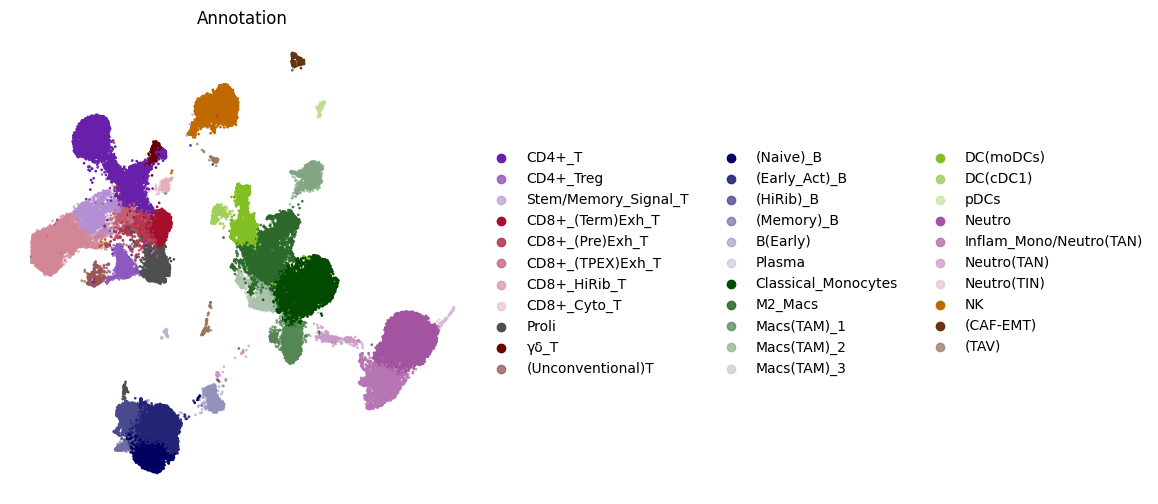

In [5]:
rcParams['figure.figsize'] = (6,6)

sc.pl.umap(
    mdata['gex'],
    color=['Annotation'],
    # increase horizontal space between panels
    wspace=0.5,legend_fontsize='medium', 
    size=15,ncols=2, vmax='p99', legend_fontoutline=6,frameon=False, show=False, palette = cell_colors
)
plt.savefig('../figures/RNA_WHOLE_scVI_ANNOTATION.png', bbox_inches='tight', dpi=400)

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


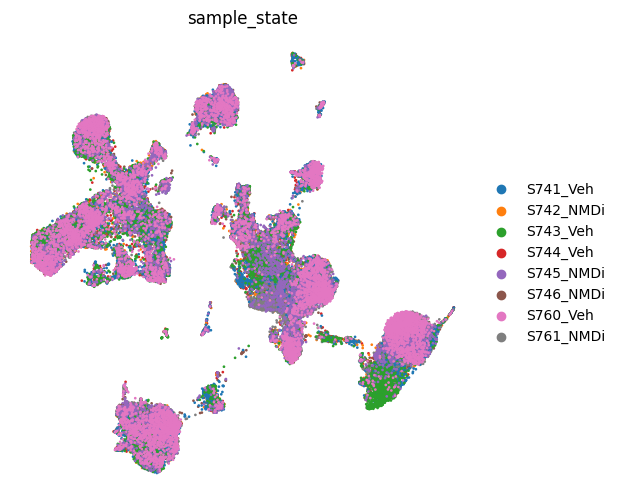

In [7]:
rcParams['figure.figsize'] = (6,6)

sc.pl.umap(
    mdata['gex'],
    color=['sample_state'],
    # increase horizontal space between panels
    wspace=0.5,legend_fontsize='medium', 
    size=15,ncols=2, vmax='p99', legend_fontoutline=6,frameon=False, show=False
)
plt.savefig('../figures/RNA_WHOLE_scVI_Sample.png', bbox_inches='tight', dpi=400)

In [8]:
mdata.write('../objects/mdata_tcr.h5mu', compression='gzip')

# INIT PIPELINE

In [1]:
import sys
sys.path = [p for p in sys.path if ".local" not in p]


import scirpy as ir
import pandas as pd
import os
import scanpy as sc
import anndata as ad
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import sparse
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
rcParams['figure.figsize'] = (7,7)
import seaborn as sns
import muon as mu
import anndata as an

In [122]:
mdata = mu.read('../objects/mdata_tcr.h5mu')

/home/macera/.conda/envs/immune_analysis/lib/python3.10/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/home/macera/.conda/envs/immune_analysis/lib/python3.10/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


In [12]:
mdata

MuData object with n_obs × n_vars = 19543 × 25760
  2 modalities
    gex:	19543 x 25760
      obs:	'library', 'sample_barcode', 'sample_name', 'source', 'DoubletDetection', 'DoubletDetection_score', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'leiden_0.1', 'leiden_0.15', 'Annotation_l1', 'leiden', 'Annotation_l2', 'qc_filter_reason', 'L1_Voting', 'L2_Voting', 'cd4_score', 'cd8_score', 'Monocyte_score', 'Macrophage_score', 'Annotation'
      var:	'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'Annotation_colors', 'Annotation_l1_colors', 'Annotation_l2_colors', 'L2_Voting_colors', 'airr:cc_aa_tcrdist_colors', 'airr:clonal_expansion_colors', 'airr:clone_id_colors', 'airr_bcr:sample_barcode_colors', 'airr_tcr:sample_barcode_colors', 'dendrogram_leiden', 'gex:Annotation_colors', 'gex:Annotation_l1_colors', 'gex:Annotation_l2_colors', 'hvg', 'leiden', 'leiden_0.1', 'leiden_0.15', 'leiden_0.15_colors', 'leiden_0.1_colors', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'umap'
      obsm:	'X_Harmony', 'X_Harmony_scaled', 'X_pca', 'X_scVI', 'X_umap', 'X_umap_Harmony', 'X_umap_Harmony_scaled', 'X_umap_RAW', 'X_umap_RAW_scaled'
      varm:	'PCs'
      layers:	'counts'
      obsp:	'connectivities', 'distances'
    airr:	19543 x 0
      obs:	'library', 'sample_barcode', 'sample_name', 'source', 'receptor_type', 'receptor_subtype', 'chain_pairing', 'clone_id', 'clone_id_size', 'cc_aa_tcrdist', 'cc_aa_tcrdist_size', 'cc_aa_tcrdist_same_v', 'cc_aa_tcrdist_same_v_size', 'clonal_expansion'
      uns:	'cc_aa_tcrdist', 'cc_aa_tcrdist_same_v', 'chain_indices', 'clone_id', 'clonotype_network', 'ir_dist_aa_identity', 'ir_dist_aa_tcrdist', 'ir_dist_nt_identity'
      obsm:	'X_clonotype_network', 'airr', 'chain_indices'

In [10]:
ir.pp.index_chains(mdata)
ir.tl.chain_qc(mdata)

In [11]:
mdata.obs["airr:receptor_type"].value_counts()

airr:receptor_type
TCR    22938
Name: count, dtype: int64

In [12]:
mdata

MuData object with n_obs × n_vars = 73640 × 25760
  2 modalities
    gex:	71977 x 25760
      obs:	'library', 'sample_barcode', 'sample_name', 'source', 'DoubletDetection', 'DoubletDetection_score', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'leiden_0.1', 'leiden_0.15', 'Annotation_l1', 'leiden', 'Annotation_l2', 'qc_filter_reason', 'L1_Voting', 'L2_Voting', 'cd4_score', 'cd8_score', 'Monocyte_score', 'Macrophage_score', 'Annotation', 'gex:Annotation_updated', 'Annotation_updated', 'Treatment', 'Cells_injectyed', 'Lung_Weight', 'sample_state', 'Response', 'TCR_clone_size', 'TCR_clone_id'
      var:	'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'Annotation_colors', 'Annotation_l1_colors', 'Annotation_l2_colors', 'L2_Voting_colors', 'Treatment_colors', 'airr_bcr:sample_barcode_colors', 'airr_tcr:sample_barcode_colors', 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_0.1', 'leiden_0.15', 'leiden_0.15_colors', 'leiden_0.1_colors', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'umap', 'sample_state_colors'
      obsm:	'X_Harmony', 'X_Harmony_scaled', 'X_pca', 'X_scVI', 'X_umap', 'X_umap_Harmony', 'X_umap_Harmony_scaled', 'X_umap_RAW', 'X_umap_RAW_scaled'
      varm:	'PCs'
      layers:	'counts'
      obsp:	'connectivities', 'distances'
    airr:	22938 x 0
      obs:	'library', 'sample_barcode', 'sample_name', 'source', 'receptor_type', 'receptor_subtype', 'chain_pairing'
      uns:	'chain_indices'
      obsm:	'airr', 'chain_indices'

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


[<Axes: title={'center': 'Cd3e'}, xlabel='X_umap1', ylabel='X_umap2'>,
 <Axes: title={'center': 'airr:receptor_type'}, xlabel='X_umap1', ylabel='X_umap2'>]

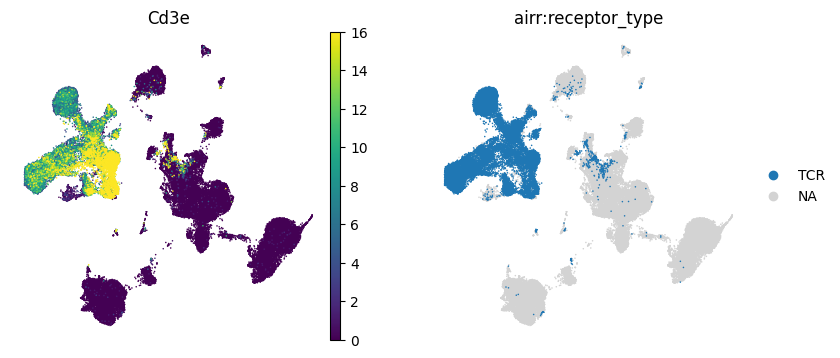

In [13]:
rcParams['figure.figsize'] = (4,4)
mu.pl.embedding(mdata, basis="gex:umap", color=["Cd3e",'airr:receptor_type'],vmax='p96', show=False, frameon=False, size=5)

# QC

Text(0.5, 1.0, '')

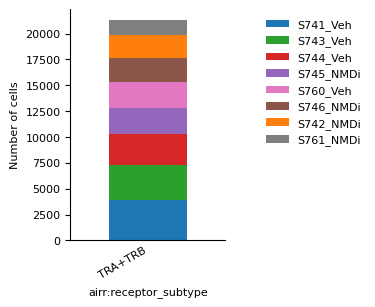

In [30]:
rcParams['figure.figsize'] = (6,6)

_ = ir.pl.group_abundance(mdata, groupby="airr:receptor_subtype", target_col="gex:sample_state", fig_kws={'figsize':(2,3)})
plt.title('')

Text(0.5, 1.0, '')

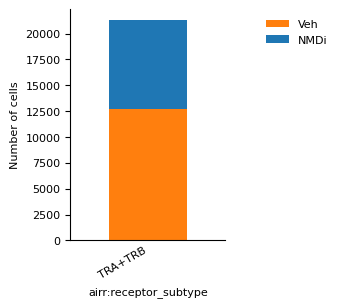

In [31]:
rcParams['figure.figsize'] = (6,6)

_ = ir.pl.group_abundance(mdata, groupby="airr:receptor_subtype", target_col="gex:Treatment", fig_kws={'figsize':(2,3)})
plt.title('')

Text(0.5, 1.0, '')

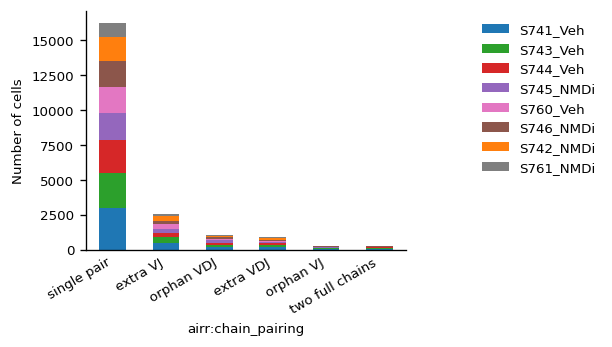

In [32]:
_ = ir.pl.group_abundance(mdata, groupby="airr:chain_pairing", target_col="gex:sample_state")
plt.title('')

Text(0.5, 1.0, '')

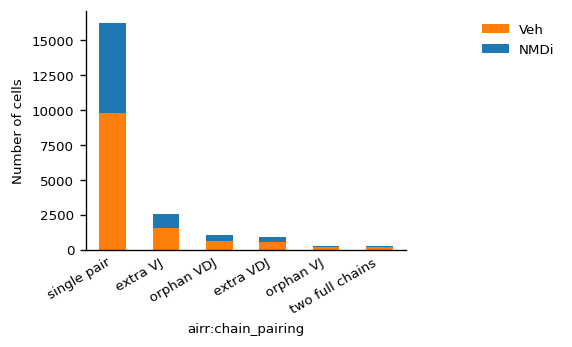

In [33]:
_ = ir.pl.group_abundance(mdata, groupby="airr:chain_pairing", target_col="gex:Treatment")
plt.title('')

In [34]:
print(
    "Fraction of cells with more than one pair of TCRs: {:.2f}".format(
        np.sum(mdata.obs["airr:chain_pairing"].isin(["extra VJ", "extra VDJ", "two full chains", "multichain"]))
        / mdata["airr"].n_obs
    )
)

Fraction of cells with more than one pair of TCRs: 0.17


/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


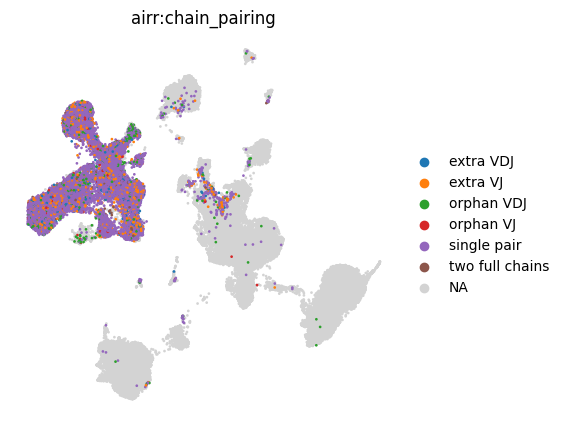

In [35]:
rcParams['figure.figsize'] = (5,5)

mu.pl.embedding(mdata, basis="gex:umap", color=["airr:chain_pairing"], size=15, vmax='p99', frameon=False)


## SUBSET TCR WITH AT LEAST ONE FULL PAIR OF RECEPTOR SEQUENCE

In [147]:
mdata

MuData object with n_obs × n_vars = 19924 × 25760
  2 modalities
    gex:	19924 x 25760
      obs:	'library', 'sample_barcode', 'sample_name', 'source', 'DoubletDetection', 'DoubletDetection_score', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'leiden_0.1', 'leiden_0.15', 'Annotation_l1', 'leiden', 'Annotation_l2', 'qc_filter_reason', 'L1_Voting', 'L2_Voting', 'cd4_score', 'cd8_score', 'Monocyte_score', 'Macrophage_score', 'Annotation', 'gex:Annotation_updated', 'Annotation_updated', 'Treatment', 'Cells_injectyed', 'Lung_Weight', 'sample_state', 'Response', 'TCR_clone_size', 'TCR_clone_id'
      var:	'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'Annotation_colors', 'Annotation_l1_colors', 'Annotation_l2_colors', 'L2_Voting_colors', 'Treatment_colors', 'airr:chain_pairing_colors', 'airr:receptor_type_colors', 'airr_bcr:sample_barcode_colors', 'airr_tcr:sample_barcode_colors', 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_0.1', 'leiden_0.15', 'leiden_0.15_colors', 'leiden_0.1_colors', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'sample_state_colors', 'umap'
      obsm:	'X_Harmony', 'X_Harmony_scaled', 'X_pca', 'X_scVI', 'X_umap', 'X_umap_Harmony', 'X_umap_Harmony_scaled', 'X_umap_RAW', 'X_umap_RAW_scaled'
      varm:	'PCs'
      layers:	'counts'
      obsp:	'connectivities', 'distances'
    airr:	19924 x 0
      obs:	'library', 'sample_barcode', 'sample_name', 'source', 'receptor_type', 'receptor_subtype', 'chain_pairing'
      uns:	'chain_indices'
      obsm:	'airr', 'chain_indices'

In [37]:
# mask = mdata.obs.index.isin(mdata['gex'].obs[mdata['gex'].obs['Annotation_l1'].isin(['T_cells','Cycling/Proliferating'])].index) & mdata.obs.index.isin(mdata['airr'].obs[~mdata['airr'].obs["chain_pairing"].isin(["orphan VDJ", "orphan VJ"])].index)
mask = mdata.obs.index.isin(mdata['airr'].obs[~mdata['airr'].obs["chain_pairing"].isin(["orphan VDJ", "orphan VJ"])].index)

# mask = mdata.obs.index.isin(mdata['airr'].obs[~mdata['airr'].obs["chain_pairing"].isin(["orphan VDJ", "orphan VJ"])].index)

In [39]:
mu.pp.filter_obs(mdata, mdata.obs[mask].index)

In [40]:
mdata

MuData object with n_obs × n_vars = 21147 × 25760
  2 modalities
    gex:	19924 x 25760
      obs:	'library', 'sample_barcode', 'sample_name', 'source', 'DoubletDetection', 'DoubletDetection_score', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'leiden_0.1', 'leiden_0.15', 'Annotation_l1', 'leiden', 'Annotation_l2', 'qc_filter_reason', 'L1_Voting', 'L2_Voting', 'cd4_score', 'cd8_score', 'Monocyte_score', 'Macrophage_score', 'Annotation', 'gex:Annotation_updated', 'Annotation_updated', 'Treatment', 'Cells_injectyed', 'Lung_Weight', 'sample_state', 'Response', 'TCR_clone_size', 'TCR_clone_id'
      var:	'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'Annotation_colors', 'Annotation_l1_colors', 'Annotation_l2_colors', 'L2_Voting_colors', 'Treatment_colors', 'airr_bcr:sample_barcode_colors', 'airr_tcr:sample_barcode_colors', 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_0.1', 'leiden_0.15', 'leiden_0.15_colors', 'leiden_0.1_colors', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'umap', 'sample_state_colors', 'airr:receptor_type_colors', 'airr:chain_pairing_colors'
      obsm:	'X_Harmony', 'X_Harmony_scaled', 'X_pca', 'X_scVI', 'X_umap', 'X_umap_Harmony', 'X_umap_Harmony_scaled', 'X_umap_RAW', 'X_umap_RAW_scaled'
      varm:	'PCs'
      layers:	'counts'
      obsp:	'connectivities', 'distances'
    airr:	21147 x 0
      obs:	'library', 'sample_barcode', 'sample_name', 'source', 'receptor_type', 'receptor_subtype', 'chain_pairing'
      uns:	'chain_indices'
      obsm:	'airr', 'chain_indices'

In [41]:
mu.pp.intersect_obs(mdata)
mdata

MuData object with n_obs × n_vars = 19924 × 25760
  2 modalities
    gex:	19924 x 25760
      obs:	'library', 'sample_barcode', 'sample_name', 'source', 'DoubletDetection', 'DoubletDetection_score', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'leiden_0.1', 'leiden_0.15', 'Annotation_l1', 'leiden', 'Annotation_l2', 'qc_filter_reason', 'L1_Voting', 'L2_Voting', 'cd4_score', 'cd8_score', 'Monocyte_score', 'Macrophage_score', 'Annotation', 'gex:Annotation_updated', 'Annotation_updated', 'Treatment', 'Cells_injectyed', 'Lung_Weight', 'sample_state', 'Response', 'TCR_clone_size', 'TCR_clone_id'
      var:	'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'Annotation_colors', 'Annotation_l1_colors', 'Annotation_l2_colors', 'L2_Voting_colors', 'Treatment_colors', 'airr_bcr:sample_barcode_colors', 'airr_tcr:sample_barcode_colors', 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_0.1', 'leiden_0.15', 'leiden_0.15_colors', 'leiden_0.1_colors', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'umap', 'sample_state_colors', 'airr:receptor_type_colors', 'airr:chain_pairing_colors'
      obsm:	'X_Harmony', 'X_Harmony_scaled', 'X_pca', 'X_scVI', 'X_umap', 'X_umap_Harmony', 'X_umap_Harmony_scaled', 'X_umap_RAW', 'X_umap_RAW_scaled'
      varm:	'PCs'
      layers:	'counts'
      obsp:	'connectivities', 'distances'
    airr:	19924 x 0
      obs:	'library', 'sample_barcode', 'sample_name', 'source', 'receptor_type', 'receptor_subtype', 'chain_pairing'
      uns:	'chain_indices'
      obsm:	'airr', 'chain_indices'

In [42]:
mdata.update()

In [43]:
mdata.write('../objects/mdata_tcr.h5mu', compression='gzip')